In [1]:
import json

from pathlib import Path

import pandas as pd
import numpy as np

import biopsykit as bp


from biopsykit.classification.model_selection import SklearnPipelinePermuter
import pepbench.plotting

from pepbench.io import load_best_performing_algos_b_point, load_preprocessed_training_data, compute_abs_error, \
     get_best_pipeline_results, get_best_estimator, get_pipeline_steps, compute_mae_std_from_permuter

import pingouin as pg

import matplotlib.pyplot as plt

#%matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
model_path = Path("../../../results/models/b-point")
data_path = Path("../../../results/data/b-point")
result_path = Path("../../../results")
rater = "rater_01"

In [3]:
input_data = pd.read_csv(data_path.joinpath(f"without-rr-interval/{rater}/train_data_b_point.csv"), index_col=[0,1,2,3,4,5])
input_data

,,,,,,arbol2017-isoelectric-crossings,arbol2017-second-derivative,arbol2017-third-derivative,debski1993-second-derivative,drost2022,forouzanfar2018,lozano2007-linear-regression,lozano2007-quadratic-regression,miljkovic2022,pale2021,sherwood1990,stern1985
,participant,condition,phase,heartbeat_id_reference,b_point_sample_reference,,,,,,,,,,,,
0,GDN0005,Dummy,HoldingBreath,0,388.0,438.0,398.0,394.0,452.0,400.0,550.0,412.0,384.0,442.0,388.0,442.0,388.0
1,GDN0005,Dummy,HoldingBreath,1,404.0,340.0,350.0,244.0,388.0,420.0,402.0,404.0,384.0,288.0,246.0,330.0,402.0
2,GDN0005,Dummy,HoldingBreath,3,376.0,382.0,296.0,386.0,366.0,386.0,388.0,366.0,348.0,386.0,374.0,382.0,374.0
3,GDN0005,Dummy,HoldingBreath,4,390.0,394.0,344.0,396.0,376.0,396.0,398.0,372.0,348.0,398.0,388.0,394.0,388.0
4,GDN0005,Dummy,HoldingBreath,5,386.0,398.0,312.0,388.0,418.0,392.0,390.0,378.0,354.0,392.0,384.0,400.0,384.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11606,VP_032,tsst,Talk,39,310.0,335.0,276.0,324.0,300.0,318.0,306.0,305.0,294.0,308.0,306.0,337.0,306.0
11607,VP_032,tsst,Talk,40,322.0,331.0,298.0,330.0,311.0,322.0,311.0,321.0,303.0,329.0,85.0,329.0,287.0
11608,VP_032,tsst,Talk,41,340.0,317.0,300.0,348.0,330.0,343.0,309.0,332.0,322.0,292.0,14.0,311.0,287.0


In [9]:
permuter1 = SklearnPipelinePermuter.from_pickle(model_path.joinpath(f"rr-interval/{rater}/b_point_regression_hpc_0_baseline_result_rr_{rater}.pkl"))
permuter1.metric_summary()

c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarn

conf_matrix  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                        
StandardScaler  SelectFromModel     DecisionTreeRegressor       [0.0]   
                                    RandomForestRegressor       [0.0]   
                                    SVR                         [0.0]   
                                    KNeighborsRegressor         [0.0]   
                SelectKBest         DecisionTreeRegressor       [0.0]   
                                    RandomForestRegressor       [0.0]   
                                    SVR                         [0.0]   
                                    KNeighborsRegressor         [0.0]   
MinMaxScaler    SelectFromModel     DecisionTreeRegressor       [0.0]   
                                    RandomForestRegressor       [0.0]   
                                    SVR                         [0.0]   
                                    KNeighborsRegressor         [0.0]   
                SelectKBest         DecisionTreeRegressor       [0.0]   
                                    RandomForestRegressor       [0.0]   
                                    SVR                         [0.0]   
                                    KNeighborsRegressor         [0.0]   

                                                          conf_matrix_folds  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                              
StandardScaler  SelectFromModel     DecisionTreeRegressor                []   
                                    RandomForestRegressor                []   
                                    SVR                                  []   
                                    KNeighborsRegressor                  []   
                SelectKBest         DecisionTreeRegressor                []   
                                    RandomForestRegressor                []   
                                    SVR                                  []   
                                    KNeighborsRegressor                  []   
MinMaxScaler    SelectFromModel     DecisionTreeRegressor                []   
                                    RandomForestRegressor                []   
                                    SVR                                  []   
                                    KNeighborsRegressor                  []   
                SelectKBest         DecisionTreeRegressor                []   
                                    RandomForestRegressor                []   
                                    SVR                                  []   
                                    KNeighborsRegressor                  []   

                                                                                                 true_labels  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                               
StandardScaler  SelectFromModel     DecisionTreeRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                                    RandomForestRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                                    SVR                    [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                                    KNeighborsRegressor    [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                SelectKBest         DecisionTreeRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                                    RandomForestRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                                    SVR                    [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                                    KNeighborsRegressor    [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
MinMaxScaler    SelectFromModel     DecisionTreeRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                                    RandomForestRegressor  [370.0, 346.0, 374.0, 316.0, 

#### Compute mean and std of the machine learning predictions:

In [10]:
compute_mae_std_from_permuter(permuter1)

mae  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                      
StandardScaler  SelectFromModel     DecisionTreeRegressor  8.254925   
                                    RandomForestRegressor  7.804929   
                                    SVR                    7.989289   
                                    KNeighborsRegressor    8.941306   
                SelectKBest         DecisionTreeRegressor  8.193886   
                                    RandomForestRegressor  7.826447   
                                    SVR                    7.772684   
                                    KNeighborsRegressor    8.673276   
MinMaxScaler    SelectFromModel     DecisionTreeRegressor  8.191072   
                                    RandomForestRegressor  7.799676   
                                    SVR                    8.626069   
                                    KNeighborsRegressor    8.932630   
                SelectKBest         DecisionTreeRegressor  8.324745   
                                    RandomForestRegressor  7.760120   
                                    SVR                    8.636890   
                                    KNeighborsRegressor    8.621651   

                                                                 std  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                       
StandardScaler  SelectFromModel     DecisionTreeRegressor  14.134460   
                                    RandomForestRegressor  11.383359   
                                    SVR                    13.001643   
                                    KNeighborsRegressor    11.684915   
                SelectKBest         DecisionTreeRegressor  14.212169   
                                    RandomForestRegressor  11.655634   
                                    SVR                    13.520134   
                                    KNeighborsRegressor    12.335953   
MinMaxScaler    SelectFromModel     DecisionTreeRegressor  13.802693   
                                    RandomForestRegressor  11.539774   
                                    SVR                    12.618193   
                                    KNeighborsRegressor    11.606045   
                SelectKBest         DecisionTreeRegressor  14.074712   
                                    RandomForestRegressor  11.554612   
                                    SVR                    12.542050   
                                    KNeighborsRegressor    12.340107   

                                                                                                 true_labels  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                               
StandardScaler  SelectFromModel     DecisionTreeRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                                    RandomForestRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                                    SVR                    [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                                    KNeighborsRegressor    [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                SelectKBest         DecisionTreeRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                                    RandomForestRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                                    SVR                    [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                                    KNeighborsRegressor    [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
MinMaxScaler    SelectFromModel     DecisionTreeRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                                    RandomForestRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                                    SVR                    [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                                

In [11]:
permuter1.best_estimator_summary()

best_estimator
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                            
StandardScaler  SelectFromModel     DecisionTreeRegressor  [Pipeline(memory=Memory(location=cachedir/jobl...
                                    RandomForestRegressor  [Pipeline(memory=Memory(location=cachedir/jobl...
                                    SVR                    [Pipeline(memory=Memory(location=cachedir/jobl...
                                    KNeighborsRegressor    [Pipeline(memory=Memory(location=cachedir/jobl...
                SelectKBest         DecisionTreeRegressor  [Pipeline(memory=Memory(location=cachedir/jobl...
                                    RandomForestRegressor  [Pipeline(memory=Memory(location=cachedir/jobl...
                                    SVR                    [Pipeline(memory=Memory(location=cachedir/jobl...
                                    KNeighborsRegressor    [Pipeline(memory=Memory(location=cachedir/jobl...
MinMaxScaler    SelectFromModel     DecisionTreeRegressor  [Pipeline(memory=Memory(location=cachedir/jobl...
                                    RandomForestRegressor  [Pipeline(memory=Memory(location=cachedir/jobl...
                                    SVR                    [Pipeline(memory=Memory(location=cachedir/jobl...
                                    KNeighborsRegressor    [Pipeline(memory=Memory(location=cachedir/jobl...
                SelectKBest         DecisionTreeRegressor  [Pipeline(memory=Memory(location=cachedir/jobl...
                                    RandomForestRegressor  [Pipeline(memory=Memory(location=cachedir/jobl...
                                    SVR                    [Pipeline(memory=Memory(location=cachedir/jobl...
                                    KNeighborsRegressor    [Pipeline(memory=Memory(location=cachedir/jobl...

In [12]:
best_ml_algo = get_best_pipeline_results(permuter1, metric="mean_absolute_error")
best_ml_algo

,,,conf_matrix,conf_matrix_folds,true_labels,true_labels_folds,predicted_labels,predicted_labels_folds,train_indices,train_indices_folds,test_indices,test_indices_folds,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,test_neg_mean_absolute_error_fold_0,test_neg_mean_absolute_error_fold_1,test_neg_mean_absolute_error_fold_2,test_neg_mean_absolute_error_fold_3,test_neg_mean_absolute_error_fold_4
MinMaxScaler,SelectKBest,RandomForestRegressor,[0.0],[],"[370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...","[[370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 33...","[365.7921095571096, 341.58623258767375, 376.67...","[[365.7921095571096, 341.58623258767375, 376.6...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...","[2241, 2242, 2243, 2244, 2245, 2246, 2247, 224...","[[2241, 2242, 2243, 2244, 2245, 2246, 2247, 22...",7.763416,0.602281,8.191675,6.764671,7.426254,7.9857,8.44878


In [13]:
best_estimator, _ = get_best_estimator(permuter1, metric="mean_absolute_error")
best_estimator

[Pipeline(memory=Memory(location=cachedir/joblib),
         steps=[('scaler', MinMaxScaler()),
                ('reduce_dim',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x0000015E540372E0>)),
                ('clf',
                 RandomForestRegressor(ccp_alpha=0.001,
                                       criterion='friedman_mse',
                                       max_depth=np.int64(30), max_features=0.8,
                                       min_impurity_decrease=0.01,
                                       min_samples_leaf=5, min_samples_split=10,
                                       n_estimators=50,
                                       random_state=RandomState(MT19937) at 0x15E51FD2240))]), Pipeline(memory=Memory(location=cachedir/joblib),
         steps=[('scaler', MinMaxScaler()),
                ('reduce_dim',
                 SelectKBest(k='all',
                             score_func=<function mutual_in

In [14]:
get_pipeline_steps(permuter1, input_data=input_data, metric="mean_absolute_error", step="reduce_dim", scaler=True)

IndexError: boolean index did not match indexed array along axis 0; size of axis is 12 but size of corresponding boolean axis is 13

### Compute the PEP with the predicted labels of the models test indices and the reference Q-wave for the test indices

In [117]:
test_indices = best_ml_algo['test_indices'].values[0]
test_indices

array([ 2257,  2258,  2259, ..., 10139, 10140, 10141])

In [229]:
# Load training data with reference Q-wave
q_wave_reference = pd.read_csv(result_path.joinpath("data/b-point/without-rr-interval/train_data_b_point_q_wave_reference_nan.csv"), index_col=[0,1,2,3,4,5])
q_wave_reference.iloc[test_indices]['q_wave_onset_sample_reference'].values

array([264., 262., 264., ..., 126., 128., 128.])

In [230]:
best_ml_algo['predicted_labels'].values[0]

array([366.1975    , 342.5       , 375.1025    , ..., 220.80221053,
       227.8167671 , 222.37004107])

In [231]:
reference_pep = best_ml_algo['true_labels'].values[0] - q_wave_reference.iloc[test_indices]['q_wave_onset_sample_reference'].values
reference_pep

array([106.,  84., 110., ...,  95., 101.,  93.])

In [232]:
pep = best_ml_algo['predicted_labels'].values[0] - q_wave_reference.iloc[test_indices]['q_wave_onset_sample_reference'].values
pep

array([102.1975    ,  80.5       , 111.1025    , ...,  94.80221053,
        99.8167671 ,  94.37004107])

In [233]:
ml_pep_ae = np.abs(reference_pep - pep)
ml_pep_ae

array([3.8025    , 3.5       , 1.1025    , ..., 0.19778947, 1.1832329 ,
       1.37004107])

In [234]:
print(f"mae: {np.mean(ml_pep_ae)}")
print(f"std: {np.std(ml_pep_ae)}")

mae: 7.74036759305247
std: 11.511178576599416


In [235]:
pep_traditional_algorithms = pd.DataFrame(index=q_wave_reference.index, columns=['reference_pep', 'pep_Arb17IC', 'pep_Arb17SD', 'pep_Arb17TD', 'pep_Deb93', 'pep_Dro22', 'pep_For18', 'pep_LozLR', 'pep_LozQR', 'pep_She90', 'pep_Ste85'])
pep_traditional_algorithms

,,,,,,reference_pep,pep_Arb17IC,pep_Arb17SD,pep_Arb17TD,pep_Deb93,pep_Dro22,pep_For18,pep_LozLR,pep_LozQR,pep_She90,pep_Ste85
,participant,condition,phase,heartbeat_id_reference,b_point_sample_reference,,,,,,,,,,,
0,GDN0005,Dummy,HoldingBreath,0,388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GDN0005,Dummy,HoldingBreath,1,404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GDN0005,Dummy,HoldingBreath,3,376.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GDN0005,Dummy,HoldingBreath,4,390.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GDN0005,Dummy,HoldingBreath,5,386.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11606,VP_032,tsst,Talk,39,310.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11607,VP_032,tsst,Talk,40,322.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11608,VP_032,tsst,Talk,41,340.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
pep_traditional_algorithms['reference_pep'] = q_wave_reference.index.get_level_values('b_point_sample_reference') - q_wave_reference['q_wave_onset_sample_reference']
pep_traditional_algorithms['pep_Arb17IC'] = q_wave_reference['arbol2017-isoelectric-crossings'] - q_wave_reference['q_wave_onset_sample_reference']
pep_traditional_algorithms['pep_Arb17SD'] = q_wave_reference['arbol2017-second-derivative'] - q_wave_reference['q_wave_onset_sample_reference']
pep_traditional_algorithms['pep_Arb17TD'] = q_wave_reference['arbol2017-third-derivative'] - q_wave_reference['q_wave_onset_sample_reference']
pep_traditional_algorithms['pep_Deb93'] = q_wave_reference['debski1993-second-derivative'] - q_wave_reference['q_wave_onset_sample_reference']
pep_traditional_algorithms['pep_Dro22'] = q_wave_reference['drost2022'] - q_wave_reference['q_wave_onset_sample_reference']
pep_traditional_algorithms['pep_For18'] = q_wave_reference['forounzafar2018'] - q_wave_reference['q_wave_onset_sample_reference']
pep_traditional_algorithms['pep_LozLR'] = q_wave_reference['lozano2007-linear-regression'] - q_wave_reference['q_wave_onset_sample_reference']
pep_traditional_algorithms['pep_LozQR'] = q_wave_reference['lozano2007-quadratic-regression'] - q_wave_reference['q_wave_onset_sample_reference']
pep_traditional_algorithms['pep_She90'] = q_wave_reference['sherwood1990'] - q_wave_reference['q_wave_onset_sample_reference']
pep_traditional_algorithms['pep_Ste85'] = q_wave_reference['stern1985'] - q_wave_reference['q_wave_onset_sample_reference']
pep_traditional_algorithms

,,,,,,reference_pep,pep_Arb17IC,pep_Arb17SD,pep_Arb17TD,pep_Deb93,pep_Dro22,pep_For18,pep_LozLR,pep_LozQR,pep_She90,pep_Ste85
,participant,condition,phase,heartbeat_id_reference,b_point_sample_reference,,,,,,,,,,,
0,GDN0005,Dummy,HoldingBreath,0,388.0,128.0,178.0,138.0,134.0,192.0,140.0,290.0,152.0,124.0,182.0,128.0
1,GDN0005,Dummy,HoldingBreath,1,404.0,144.0,80.0,90.0,-16.0,128.0,160.0,142.0,144.0,124.0,70.0,142.0
2,GDN0005,Dummy,HoldingBreath,3,376.0,154.0,160.0,74.0,164.0,144.0,164.0,166.0,144.0,126.0,160.0,152.0
3,GDN0005,Dummy,HoldingBreath,4,390.0,170.0,174.0,124.0,176.0,156.0,176.0,178.0,152.0,128.0,174.0,168.0
4,GDN0005,Dummy,HoldingBreath,5,386.0,158.0,170.0,84.0,160.0,190.0,164.0,162.0,150.0,126.0,172.0,156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11606,VP_032,tsst,Talk,39,310.0,138.0,163.0,104.0,152.0,128.0,146.0,134.0,133.0,122.0,165.0,134.0
11607,VP_032,tsst,Talk,40,322.0,141.0,150.0,117.0,149.0,130.0,141.0,130.0,140.0,122.0,148.0,106.0
11608,VP_032,tsst,Talk,41,340.0,140.0,117.0,100.0,148.0,130.0,143.0,109.0,132.0,122.0,111.0,87.0


In [272]:
pep_traditional_algorithms[pep_traditional_algorithms.isna().any(axis=1)]

,,,,,,reference_pep,pep_Arb17IC,pep_Arb17SD,pep_Arb17TD,pep_Deb93,pep_Dro22,pep_For18,pep_LozLR,pep_LozQR,pep_She90,pep_Ste85
,participant,condition,phase,heartbeat_id_reference,b_point_sample_reference,,,,,,,,,,,
207,GDN0005,Dummy,TiltUp,27,398.0,148.0,108.0,30.0,34.0,2.0,8.0,34.0,14.0,40.0,NaN,36.0
228,GDN0005,Dummy,TiltUp,49,400.0,190.0,126.0,40.0,6.0,8.0,8.0,8.0,24.0,52.0,NaN,0.0
326,GDN0006,Dummy,Pause,6,334.0,150.0,26.0,24.0,144.0,2.0,30.0,NaN,2.0,26.0,24.0,44.0
698,GDN0007,Dummy,TiltDown,34,518.0,130.0,150.0,28.0,42.0,40.0,16.0,40.0,6.0,10.0,NaN,50.0
864,GDN0008,Dummy,HoldingBreath,17,466.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11538,VP_032,tsst,Prep,4,355.0,96.0,168.0,46.0,2.0,74.0,3.0,2.0,35.0,26.0,NaN,76.0
11540,VP_032,tsst,Prep,6,380.0,140.0,226.0,55.0,3.0,15.0,3.0,211.0,13.0,20.0,NaN,1.0
11551,VP_032,tsst,Prep,17,320.0,61.0,26.0,23.0,58.0,NaN,28.0,47.0,63.0,58.0,31.0,47.0


In [271]:
pep_traditional_algorithms[pep_traditional_algorithms.values < 0]

,,,,,,reference_pep,pep_Arb17IC,pep_Arb17SD,pep_Arb17TD,pep_Deb93,pep_Dro22,pep_For18,pep_LozLR,pep_LozQR,pep_She90,pep_Ste85
,participant,condition,phase,heartbeat_id_reference,b_point_sample_reference,,,,,,,,,,,


In [237]:
pep_traditional_algorithms['reference_pep']

       participant  condition  phase          heartbeat_id_reference  b_point_sample_reference
0      GDN0005      Dummy      HoldingBreath  0                       388.0                       128.0
1      GDN0005      Dummy      HoldingBreath  1                       404.0                       144.0
2      GDN0005      Dummy      HoldingBreath  3                       376.0                       154.0
3      GDN0005      Dummy      HoldingBreath  4                       390.0                       170.0
4      GDN0005      Dummy      HoldingBreath  5                       386.0                       158.0
                                                                                                  ...  
11606  VP_032       tsst       Talk           39                      310.0                       138.0
11607  VP_032       tsst       Talk           40                      322.0                       141.0
11608  VP_032       tsst       Talk           41                      340

In [238]:
pep_traditional_algorithms[pep_traditional_algorithms.drop(columns=['reference_pep']).columns] = np.abs(pep_traditional_algorithms[pep_traditional_algorithms.drop(columns=['reference_pep']).columns].sub(pep_traditional_algorithms['reference_pep'], axis=0))

In [239]:
guardian_pep = pep_traditional_algorithms.xs(key='Dummy', level='condition')
guardian_pep = guardian_pep.drop(columns=['reference_pep'])
guardian_pep

,,,,,pep_Arb17IC,pep_Arb17SD,pep_Arb17TD,pep_Deb93,pep_Dro22,pep_For18,pep_LozLR,pep_LozQR,pep_She90,pep_Ste85
,participant,phase,heartbeat_id_reference,b_point_sample_reference,,,,,,,,,,
0,GDN0005,HoldingBreath,0,388.0,50.0,10.0,6.0,64.0,12.0,162.0,24.0,4.0,54.0,0.0
1,GDN0005,HoldingBreath,1,404.0,64.0,54.0,160.0,16.0,16.0,2.0,0.0,20.0,74.0,2.0
2,GDN0005,HoldingBreath,3,376.0,6.0,80.0,10.0,10.0,10.0,12.0,10.0,28.0,6.0,2.0
3,GDN0005,HoldingBreath,4,390.0,4.0,46.0,6.0,14.0,6.0,8.0,18.0,42.0,4.0,2.0
4,GDN0005,HoldingBreath,5,386.0,12.0,74.0,2.0,32.0,6.0,4.0,8.0,32.0,14.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6606,GDN0030,Valsalva,51,452.0,32.0,86.0,18.0,2.0,12.0,52.0,18.0,34.0,36.0,52.0
6607,GDN0030,Valsalva,52,462.0,26.0,86.0,12.0,2.0,10.0,48.0,16.0,34.0,28.0,48.0
6608,GDN0030,Valsalva,53,438.0,20.0,48.0,62.0,42.0,22.0,2.0,24.0,10.0,26.0,2.0


In [252]:
empkins_pep = pep_traditional_algorithms[pep_traditional_algorithms.index.get_level_values('condition') != 'Dummy']
empkins_pep = empkins_pep.drop(columns=['reference_pep'])
empkins_pep

,,,,,,pep_Arb17IC,pep_Arb17SD,pep_Arb17TD,pep_Deb93,pep_Dro22,pep_For18,pep_LozLR,pep_LozQR,pep_She90,pep_Ste85
,participant,condition,phase,heartbeat_id_reference,b_point_sample_reference,,,,,,,,,,
6611,VP_001,ftsst,Math,1,278.0,37.0,6.0,60.0,11.0,42.0,11.0,52.0,51.0,37.0,52.0
6612,VP_001,ftsst,Math,2,327.0,5.0,61.0,10.0,20.0,4.0,33.0,11.0,7.0,4.0,84.0
6613,VP_001,ftsst,Math,3,273.0,40.0,28.0,59.0,10.0,24.0,1.0,47.0,47.0,33.0,2.0
6614,VP_001,ftsst,Math,4,296.0,12.0,67.0,144.0,24.0,18.0,5.0,28.0,26.0,27.0,5.0
6615,VP_001,ftsst,Math,5,304.0,9.0,54.0,76.0,16.0,7.0,1.0,8.0,4.0,61.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11606,VP_032,tsst,Talk,39,310.0,25.0,34.0,14.0,10.0,8.0,4.0,5.0,16.0,27.0,4.0
11607,VP_032,tsst,Talk,40,322.0,9.0,24.0,8.0,11.0,0.0,11.0,1.0,19.0,7.0,35.0
11608,VP_032,tsst,Talk,41,340.0,23.0,40.0,8.0,10.0,3.0,31.0,8.0,18.0,29.0,53.0


In [249]:
mae_pep_traditional_algorithms = pd.DataFrame({'mae empkins': np.nanmean(empkins_pep, axis=0), 'std empkins': np.nanstd(empkins_pep, axis=0), 'mae guardian': np.nanmean(guardian_pep, axis=0), 'std guardian': np.nanstd(guardian_pep, axis=0)})
mae_pep_traditional_algorithms

,mae empkins,std empkins,mae guardian,std guardian
0,27.257229,26.082567,33.604100,26.439194
1,45.202803,28.934338,44.163037,28.503251
2,36.351952,51.249202,51.532522,57.317633
3,17.062323,16.817701,22.977835,23.871050
4,16.604204,24.129831,18.984946,22.027335
5,27.294248,34.834239,22.050654,35.462206
6,22.837237,17.418241,17.048366,17.062821
7,22.987187,23.566026,27.989430,27.383330
8,23.791038,14.677523,33.302408,22.470055
9,38.132113,42.041758,25.193528,40.500063


### Load predictions of the n best performing traditional algorithms on the empkins and guardian dataset (Aggregated data)

In [16]:
best_algos_empkins = load_best_performing_algos_b_point(result_path.joinpath("empkins_dataset_reference_q_wave").resolve(), n_best=4, outlier_correction = False)
best_algos_empkins

,mean,std
b_point_algorithm,,
drost2022,15.145887,6.024353
debski1993-second-derivative,16.604698,6.916449
lozano2007-quadratic-regression,21.237032,9.367100
lozano2007-linear-regression,21.891105,10.024544


In [17]:
best_algos_guardian = load_best_performing_algos_b_point(result_path.joinpath("guardian_dataset_reference_q_wave").resolve(), n_best=4, outlier_correction=False)
best_algos_guardian

,mean,std
b_point_algorithm,,
lozano2007-linear-regression,16.955571,6.242513
drost2022,18.538199,5.712188
forounzafar2018,20.581149,12.740951
stern1985,22.198932,14.654572


In [18]:
data_best_algos_empkins = load_preprocessed_training_data(data_path.joinpath("without-rr-interval/train_data_b_point.csv"), algorithms=best_algos_empkins.index, include_reference=True)
data_best_algos_guardian = load_preprocessed_training_data(data_path.joinpath("without-rr-interval/train_data_b_point.csv"), algorithms=best_algos_guardian.index, include_reference=True)

In [19]:
abs_error_best_empkins_algos = compute_abs_error(data_best_algos_empkins, data_best_algos_empkins["b_point_sample_reference"])
abs_error_best_empkins_algos

drost2022  \
participant condition phase         heartbeat_id_reference              
GDN0005     Dummy     HoldingBreath 0                            12.0   
                                    1                            16.0   
                                    3                            10.0   
                                    4                             6.0   
                                    5                             6.0   
...                                                               ...   
VP_032      tsst      Talk          39                            8.0   
                                    40                            0.0   
                                    41                            3.0   
                                    42                           43.0   
                                    43                           25.0   

                                                            debski1993-second-derivative  \
participant condition phase         heartbeat_id_reference                                 
GDN0005     Dummy     HoldingBreath 0                                               64.0   
                                    1                                               16.0   
                                    3                                               10.0   
                                    4                                               14.0   
                                    5                                               32.0   
...                                                                                  ...   
VP_032      tsst      Talk          39                                              10.0   
                                    40                                              11.0   
                                    41                                              10.0   
                                    42                                              36.0   
                                    43                                              22.0   

                                                            lozano2007-quadratic-regression  \
participant condition phase         heartbeat_id_reference                                    
GDN0005     Dummy     HoldingBreath 0                                                   4.0   
                                    1                                                  20.0   
                                    3                                                  28.0   
                                    4                                                  42.0   
                                    5                                                  32.0   
...                                                                                     ...   
VP_032      tsst      Talk          39                                                 16.0   
                                    40                                                 19.0   
                                    41                                                 18.0   
                                    42                                                 26.0   
                                    43                                                 22.0   

                                                            lozano2007-linear-regression  
participant condition phase         heartbeat_id_reference                                
GDN0005     Dummy     HoldingBreath 0                                               24.0  
                                    1                                                0.0  
                                    3                                               10.0  
                                    4                                               18.0  
                                    5                                                8.0  
...                                     

In [20]:
abs_error_best_empkins_algos.mean()

drost2022                          16.807348
debski1993-second-derivative       20.331634
lozano2007-quadratic-regression    24.021448
lozano2007-linear-regression       18.400981
dtype: float64

In [21]:
abs_error_best_empkins_algos.std()

drost2022                          15.085052
debski1993-second-derivative       21.370242
lozano2007-quadratic-regression    16.840681
lozano2007-linear-regression       14.813245
dtype: float64

In [22]:
abs_error_best_guardian_algos = compute_abs_error(data_best_algos_guardian, data_best_algos_guardian["b_point_sample_reference"])
abs_error_best_guardian_algos

lozano2007-linear-regression  \
participant condition phase         heartbeat_id_reference                                 
GDN0005     Dummy     HoldingBreath 0                                               24.0   
                                    1                                                0.0   
                                    3                                               10.0   
                                    4                                               18.0   
                                    5                                                8.0   
...                                                                                  ...   
VP_032      tsst      Talk          39                                               5.0   
                                    40                                               1.0   
                                    41                                               8.0   
                                    42                                              40.0   
                                    43                                              34.0   

                                                            drost2022  \
participant condition phase         heartbeat_id_reference              
GDN0005     Dummy     HoldingBreath 0                            12.0   
                                    1                            16.0   
                                    3                            10.0   
                                    4                             6.0   
                                    5                             6.0   
...                                                               ...   
VP_032      tsst      Talk          39                            8.0   
                                    40                            0.0   
                                    41                            3.0   
                                    42                           43.0   
                                    43                           25.0   

                                                            forounzafar2018  \
participant condition phase         heartbeat_id_reference                    
GDN0005     Dummy     HoldingBreath 0                                 162.0   
                                    1                                   2.0   
                                    3                                  12.0   
                                    4                                   8.0   
                                    5                                   4.0   
...                                                                     ...   
VP_032      tsst      Talk          39                                  4.0   
                                    40                                 11.0   
                                    41                                 31.0   
                                    42                                  6.0   
                                    43                                  5.0   

                                                            stern1985  
participant condition phase         heartbeat_id_reference             
GDN0005     Dummy     HoldingBreath 0                             0.0  
                                    1                             2.0  
                                    3                             2.0  
                                    4                             2.0  
                                    5                             2.0  
...                                                               ...  
VP_032      tsst      Talk          39                            4.0  
                                    40                           35.0  
                                    41                           53.0  
                                    42                            6.0  
                     

### Absolute errors of the machine learning prediction and the predictions of the best performing traditional algorithms with regard to the reference data

In [35]:
reference_labels = best_ml_algo["true_labels"].values[0]
predicted_labels = best_ml_algo["predicted_labels"].values[0]
abs_error_estimator = np.abs(predicted_labels - reference_labels)
abs_error_estimator

array([3.8025    , 3.5       , 1.1025    , ..., 0.19778947, 1.1832329 ,
       1.37004107])

In [23]:
data = [abs_error_estimator, abs_error_best_empkins_algos["drost2022"], abs_error_best_empkins_algos["debski1993-second-derivative"], abs_error_best_guardian_algos["lozano2007-linear-regression"], abs_error_best_guardian_algos["forounzafar2018"]]
labels = ["ML-Prediction", "Dro22", "Deb93", "Loz07LR", "For18"]

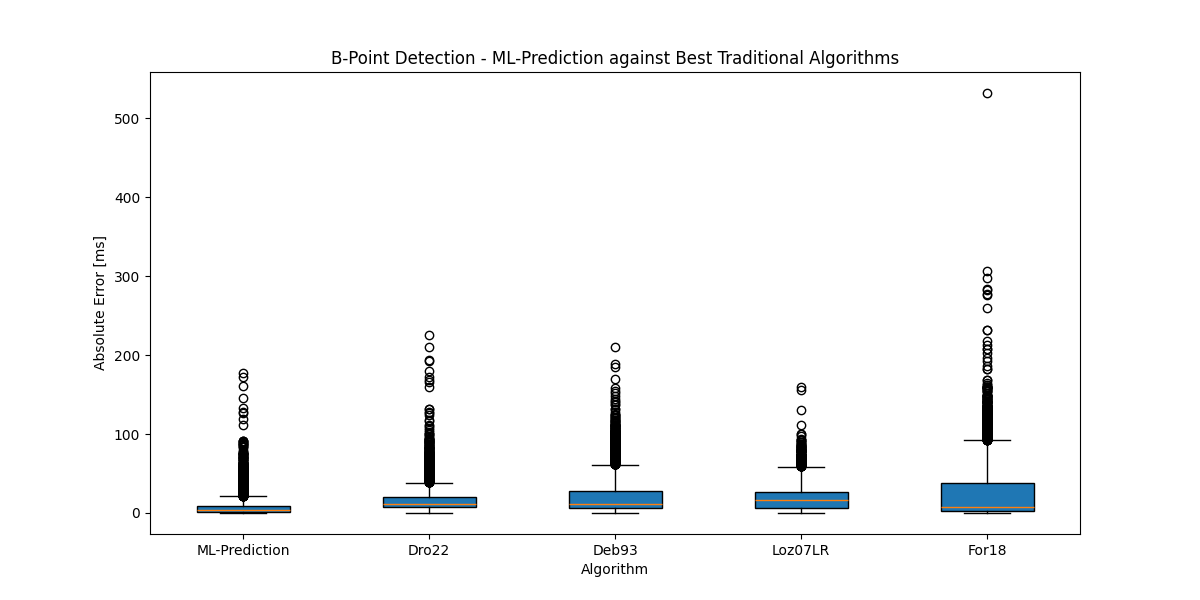

In [24]:
plt.figure(figsize=(12, 6))
plt.boxplot(data, patch_artist=True, labels=labels)
plt.title("B-Point Detection - ML-Prediction against Best Traditional Algorithms")
plt.xlabel("Algorithm")
plt.ylabel("Absolute Error [ms]")
plt.show()

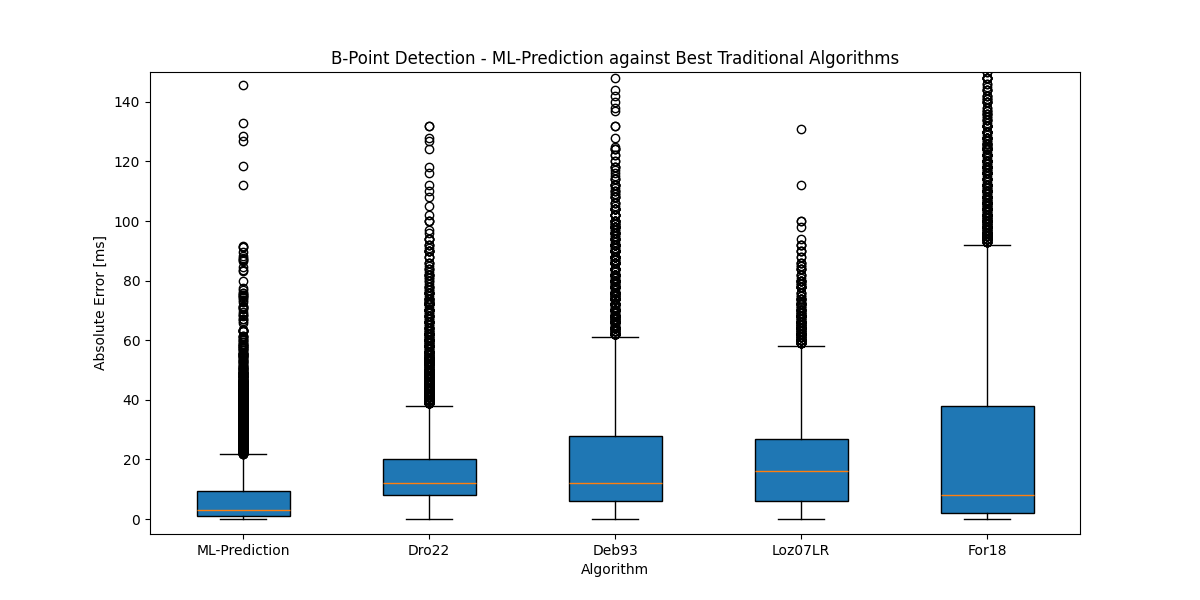

In [25]:
plt.figure(figsize=(12, 6))
plt.boxplot(data, patch_artist=True, labels=labels)
plt.title("B-Point Detection - ML-Prediction against Best Traditional Algorithms")
plt.xlabel("Algorithm")
plt.ylabel("Absolute Error [ms]")
plt.ylim(-5, 150)
plt.show()

### Residualplot of the ML-Prediction against the reference data

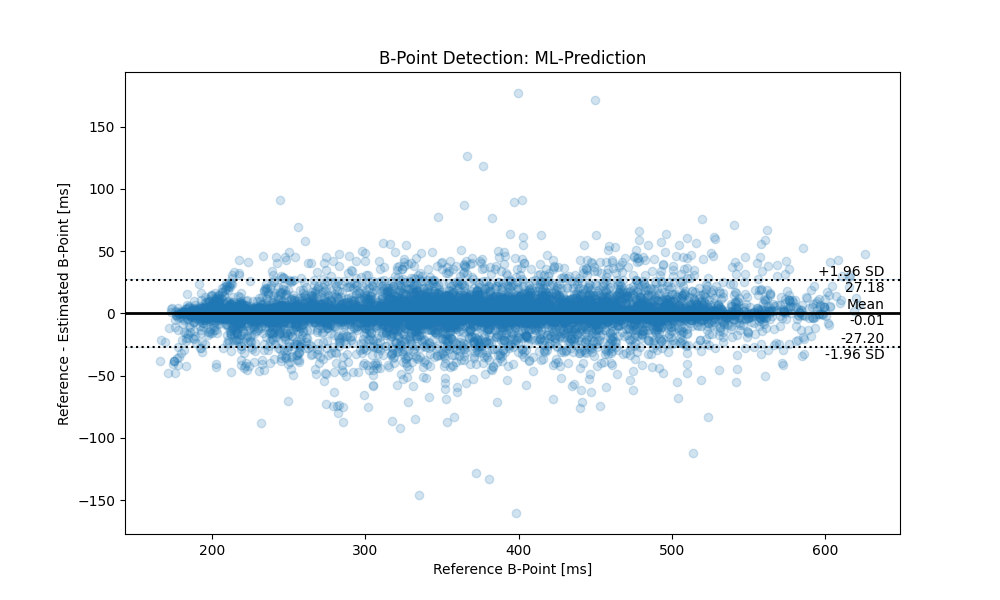

In [26]:
plt.figure(figsize=(10, 6))
pg.plot_blandaltman(best_algo["true_labels"].values[0], best_algo["predicted_labels"].values[0], alpha=0.2)
plt.title("B-Point Detection: ML-Prediction")
plt.xlabel("Reference B-Point [ms]")
plt.ylabel("Reference - Estimated B-Point [ms]")
plt.show()

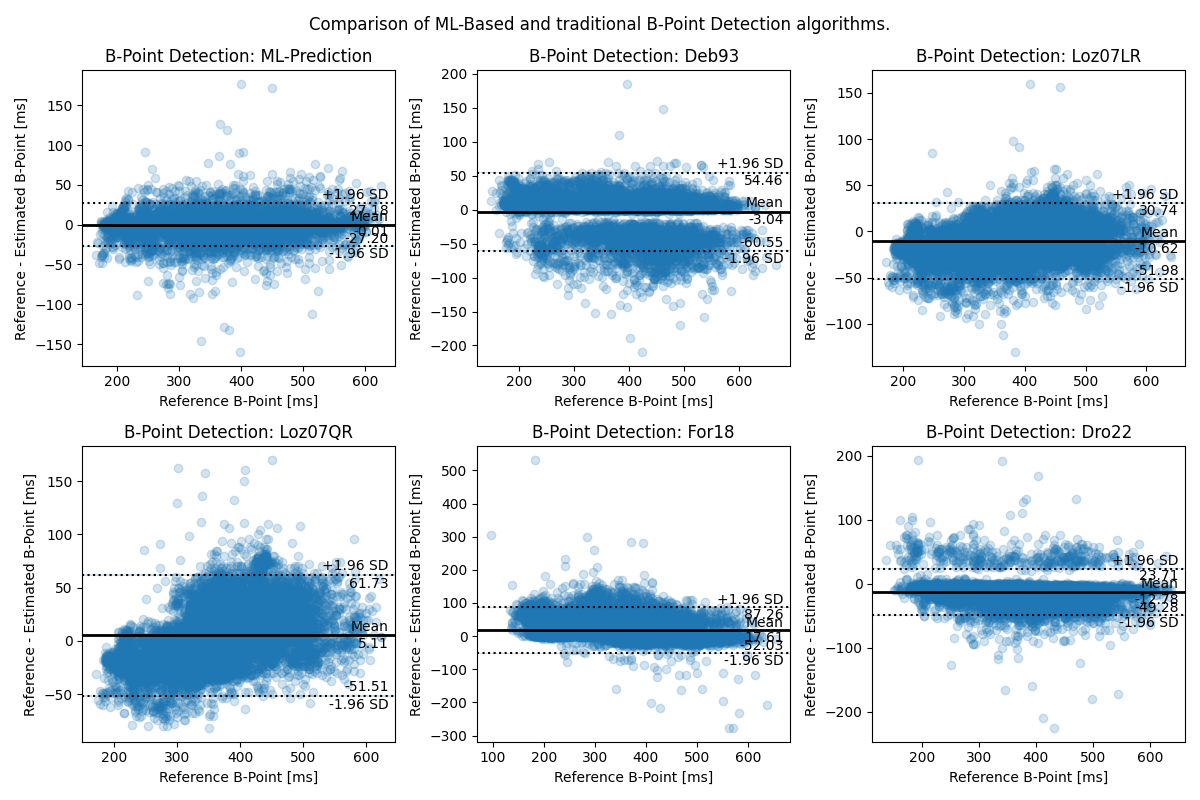

In [27]:
# Create figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Plot Bland-Altman plots
pg.plot_blandaltman(best_algo["true_labels"].values[0], best_algo["predicted_labels"].values[0], ax=axes[0, 0], alpha=0.2)
axes[0, 0].set_title("B-Point Detection: ML-Prediction")
axes[0, 0].set_xlabel("Reference B-Point [ms]")
axes[0, 0].set_ylabel("Reference - Estimated B-Point [ms]")

pg.plot_blandaltman(data_best_algos_empkins['b_point_sample_reference'], data_best_algos_empkins['debski1993-second-derivative'], ax=axes[0, 1], alpha=0.2)
axes[0, 1].set_title("B-Point Detection: Deb93")
axes[0, 1].set_xlabel("Reference B-Point [ms]")
axes[0, 1].set_ylabel("Reference - Estimated B-Point [ms]")

pg.plot_blandaltman(data_best_algos_empkins['b_point_sample_reference'], data_best_algos_empkins['lozano2007-linear-regression'], ax=axes[0, 2], alpha=0.2)
axes[0, 2].set_title("B-Point Detection: Loz07LR")
axes[0, 2].set_xlabel("Reference B-Point [ms]")
axes[0, 2].set_ylabel("Reference - Estimated B-Point [ms]")

pg.plot_blandaltman(data_best_algos_empkins['b_point_sample_reference'], data_best_algos_empkins['lozano2007-quadratic-regression'], ax=axes[1, 0], alpha=0.2)
axes[1, 0].set_title("B-Point Detection: Loz07QR")
axes[1, 0].set_xlabel("Reference B-Point [ms]")
axes[1, 0].set_ylabel("Reference - Estimated B-Point [ms]")

pg.plot_blandaltman(data_best_algos_empkins['b_point_sample_reference'], data_best_algos_guardian['forounzafar2018'], ax=axes[1, 1], alpha=0.2)
axes[1, 1].set_title("B-Point Detection: For18")
axes[1, 1].set_xlabel("Reference B-Point [ms]")
axes[1, 1].set_ylabel("Reference - Estimated B-Point [ms]")

pg.plot_blandaltman(data_best_algos_empkins['b_point_sample_reference'], data_best_algos_guardian['drost2022'], ax=axes[1, 2], alpha=0.2)
axes[1, 2].set_title("B-Point Detection: Dro22")
axes[1, 2].set_xlabel("Reference B-Point [ms]")
axes[1, 2].set_ylabel("Reference - Estimated B-Point [ms]")

fig.suptitle("Comparison of ML-Based and traditional B-Point Detection algorithms.")
plt.tight_layout()
plt.show()